<a href="https://colab.research.google.com/github/kumarjitpathakbangalore/DataScienceKT/blob/main/Conditional_Average_treatment_effect_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional Average Treatment Effect

The Conditional Average Treatment Effect (CATE) is a concept in causal inference that represents the average effect of a treatment on an outcome variable for a specific subset of the population defined by certain characteristics or conditions.

Here's a more detailed breakdown:

***Average Treatment Effect (ATE):*** This is the average effect of a treatment on the entire population. It is defined as the difference in the expected outcome if everyone in the population received the treatment versus if no one received the treatment.

***Heterogeneity in Treatment Effects:*** In reality, the effect of a treatment may not be the same for everyone. Different subgroups within the population might experience different effects. This variability is often due to different individual characteristics (like age, gender, socioeconomic status, etc.).

***Conditional Average Treatment Effect (CATE):*** To capture this heterogeneity, we define the CATE as the average treatment effect for a specific subgroup of the population, conditional on certain characteristics. Mathematically, it can be expressed as:

*   
CATE
(𝑋)
=
𝐸
[
𝑌
(
1
)
−
𝑌
(
0
)
∣
𝑋
]
CATE(X)=E[Y(1)−Y(0)∣X]


where:

E denotes the expectation (average).

𝑌
(
1
)
Y(1) is the potential outcome if treated.

𝑌
(
0
)
Y(0) is the potential outcome if not treated.

𝑋
X represents the set of characteristics or covariates that define the subgroup.


## Why is CATE Important?
*   Personalized Treatment: Understanding CATE allows for more personalized interventions. For example, a medical treatment might be more effective for older adults than for younger people. By identifying these subgroups, treatments can be tailored to those who benefit the most.

*   Policy Making: In policy decisions, knowing the CATE can help in designing targeted policies that maximize overall benefits. For instance, a job training program might have different impacts on different demographic groups, and understanding these differences can help allocate resources more efficiently.

*   Scientific Understanding: It provides deeper insights into the mechanisms behind the treatment effects. Understanding why and how the treatment works differently for different groups can inform future research and intervention designs.

## Estimating CATE

Estimating CATE can be challenging and often involves sophisticated statistical and machine learning techniques. Some common methods include:

*   Stratification: Dividing the population into subgroups based on the characteristics
𝑋
X and then estimating the treatment effect within each subgroup.

*   Regression Models: Using regression models where the interaction between the treatment and covariates is included to estimate how the treatment effect varies with the covariates.

*   Machine Learning Methods: Techniques like causal forests, Bayesian Additive Regression Trees (BART), and other ensemble methods can be used to estimate CATE in a flexible and data-driven way.



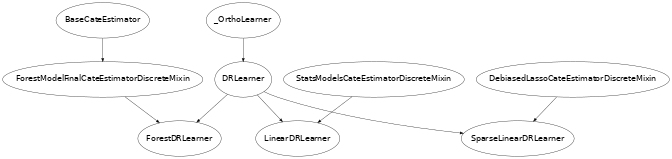

In [ ]:
Conditional Average treatment effect

Please go through :

https://econml.azurewebsites.net/

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 2000

# Generate covariates
store_ids = np.arange(1, n+1)
sales_volume_last_6_months = np.random.normal(1000, 200, size=n)
number_of_unique_sku_last_6_months = np.random.randint(10, 100, size=n)
cities = np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=n)

# Generate touchpoint flags
promo_offer = np.random.binomial(1, 0.3, size=n)
new_sku_recommendation = np.random.binomial(1, 0.3, size=n)
business_reps_visit = np.random.binomial(1, 0.3, size=n)
sms_on_offers = np.random.binomial(1, 0.3, size=n)
rewards = np.random.binomial(1, 0.3, size=n)

# Generate outcome (current month sales volume)
baseline_sales = sales_volume_last_6_months / 6 + np.random.normal(0, 50, size=n)
treatment_effect = (
    promo_offer * 0.05 * baseline_sales +
    new_sku_recommendation * 0.03 * baseline_sales +
    business_reps_visit * 0.04 * baseline_sales +
    sms_on_offers * 0.02 * baseline_sales +
    rewards * 0.01 * baseline_sales
)
current_month_sales_volume = baseline_sales + treatment_effect + np.random.normal(0, 50, size=n)

# Combine into a single DataFrame
data = pd.DataFrame({
    'Store_ID': store_ids,
    'sales_volume_last_6_months': sales_volume_last_6_months,
    'number_of_unique_sku_last_6_months': number_of_unique_sku_last_6_months,
    'city': cities,
    'promo_offer': promo_offer,
    'new_sku_recommendation': new_sku_recommendation,
    'business_reps_visit': business_reps_visit,
    'sms_on_offers': sms_on_offers,
    'rewards': rewards,
    'current_month_sales_volume': current_month_sales_volume
})

In [2]:
data.head()

,Store_ID,sales_volume_last_6_months,number_of_unique_sku_last_6_months,city,promo_offer,new_sku_recommendation,business_reps_visit,sms_on_offers,rewards,current_month_sales_volume
0,1,1099.342831,39,CityC,0,0,0,0,1,281.240273
1,2,972.347140,84,CityC,1,0,0,0,0,123.469639
2,3,1129.537708,81,CityC,0,0,0,1,1,234.943466
3,4,1304.605971,12,CityC,0,0,0,0,1,189.453631
4,5,953.169325,23,CityC,0,1,0,1,0,51.992332


In [5]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 2000

# Generate covariates
store_ids = np.arange(1, n+1)
sales_volumes_last_6_months = np.random.normal(1000, 200, size=(n, 6))
num_unique_skus_last_6_months = np.random.randint(10, 100, size=(n, 6))
cities = np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=n)

# Generate touchpoint flags
promo_offer = np.random.binomial(1, 0.3, size=n)
new_sku_recommendation = np.random.binomial(1, 0.3, size=n)
business_reps_visit = np.random.binomial(1, 0.3, size=n)
sms_on_offers = np.random.binomial(1, 0.3, size=n)
rewards = np.random.binomial(1, 0.3, size=n)

# Generate outcome (current month sales volume)
baseline_sales = sales_volumes_last_6_months.mean(axis=1)  + np.random.normal(0, 50, size=n)
treatment_effect = (
    promo_offer * 0.05 * baseline_sales +
    new_sku_recommendation * 0.03 * baseline_sales +
    business_reps_visit * 0.04 * baseline_sales +
    sms_on_offers * 0.02 * baseline_sales +
    rewards * 0.01 * baseline_sales
)
current_month_sales_volume = baseline_sales + treatment_effect + np.random.normal(0, 50, size=n)

# Combine into a single DataFrame
data = pd.DataFrame({
    'Store_ID': store_ids,
    'sales_volume_month_1': sales_volumes_last_6_months[:, 0],
    'sales_volume_month_2': sales_volumes_last_6_months[:, 1],
    'sales_volume_month_3': sales_volumes_last_6_months[:, 2],
    'sales_volume_month_4': sales_volumes_last_6_months[:, 3],
    'sales_volume_month_5': sales_volumes_last_6_months[:, 4],
    'sales_volume_month_6': sales_volumes_last_6_months[:, 5],
    'num_skus_month_1': num_unique_skus_last_6_months[:, 0],
    'num_skus_month_2': num_unique_skus_last_6_months[:, 1],
    'num_skus_month_3': num_unique_skus_last_6_months[:, 2],
    'num_skus_month_4': num_unique_skus_last_6_months[:, 3],
    'num_skus_month_5': num_unique_skus_last_6_months[:, 4],
    'num_skus_month_6': num_unique_skus_last_6_months[:, 5],
    'city': cities,
    'promo_offer': promo_offer,
    'new_sku_recommendation': new_sku_recommendation,
    'business_reps_visit': business_reps_visit,
    'sms_on_offers': sms_on_offers,
    'rewards': rewards,
    'current_month_sales_volume': current_month_sales_volume
})


In [6]:
data.head()

,Store_ID,sales_volume_month_1,sales_volume_month_2,sales_volume_month_3,sales_volume_month_4,sales_volume_month_5,sales_volume_month_6,num_skus_month_1,num_skus_month_2,num_skus_month_3,num_skus_month_4,num_skus_month_5,num_skus_month_6,city,promo_offer,new_sku_recommendation,business_reps_visit,sms_on_offers,rewards,current_month_sales_volume
0,1,1099.342831,972.347140,1129.537708,1304.605971,953.169325,953.172609,51,86,79,25,78,62,CityD,0,0,0,0,1,1073.868436
1,2,1315.842563,1153.486946,906.105123,1108.512009,907.316461,906.854049,54,60,15,42,88,24,CityA,1,0,0,1,0,1085.694281
2,3,1048.392454,617.343951,655.016433,887.542494,797.433776,1062.849467,23,48,72,14,99,90,CityB,0,0,0,1,1,954.527861
3,4,818.395185,717.539260,1293.129754,954.844740,1013.505641,715.050363,61,25,47,62,96,86,CityA,1,0,0,0,0,1001.905612
4,5,891.123455,1022.184518,769.801285,1075.139604,879.872262,941.661250,62,55,24,68,59,18,CityB,1,0,1,1,0,994.997120


In [12]:
data.shape

(2000, 20)

In [7]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 43.9 MB/s eta 0:00:00


In [8]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import t



In [27]:
data.columns

Index(['Store_ID', 'sales_volume_month_1', 'sales_volume_month_2',
       'sales_volume_month_3', 'sales_volume_month_4', 'sales_volume_month_5',
       'sales_volume_month_6', 'num_skus_month_1', 'num_skus_month_2',
       'num_skus_month_3', 'num_skus_month_4', 'num_skus_month_5',
       'num_skus_month_6', 'city', 'promo_offer', 'new_sku_recommendation',
       'business_reps_visit', 'sms_on_offers', 'rewards',
       'current_month_sales_volume'],
      dtype='object')

In [31]:
# Define features and outcome
X = pd.get_dummies(data.drop(['Store_ID', 'current_month_sales_volume','num_skus_month_1', 'num_skus_month_2',
       'num_skus_month_3', 'num_skus_month_4', 'num_skus_month_5','num_skus_month_6'], axis=1), drop_first=True)
T = data[['promo_offer', 'new_sku_recommendation', 'business_reps_visit', 'sms_on_offers', 'rewards']]
Y = data['current_month_sales_volume'].values



In [15]:
Y.shape

(2000,)

In [10]:
# Function to calculate confidence intervals and p-values
def calculate_ci_and_pval(ate, se, n):
    ci = [ate - 1.96 * se, ate + 1.96 * se]
    t_stat = ate / se
    p_val = (1 - t.cdf(abs(t_stat), df=n-1)) * 2
    return ci, p_val



In [22]:
T.head()

,promo_offer,new_sku_recommendation,business_reps_visit,sms_on_offers,rewards
0,0,0,0,0,1
1,1,0,0,1,0
2,0,0,0,1,1
3,1,0,0,0,0
4,1,0,1,1,0


In [29]:
X.head()

,sales_volume_month_1,sales_volume_month_2,sales_volume_month_3,sales_volume_month_4,sales_volume_month_5,sales_volume_month_6,num_skus_month_6,promo_offer,new_sku_recommendation,business_reps_visit,sms_on_offers,rewards,city_CityB,city_CityC,city_CityD
0,1099.342831,972.347140,1129.537708,1304.605971,953.169325,953.172609,62,0,0,0,0,1,False,False,True
1,1315.842563,1153.486946,906.105123,1108.512009,907.316461,906.854049,24,1,0,0,1,0,False,False,False
2,1048.392454,617.343951,655.016433,887.542494,797.433776,1062.849467,90,0,0,0,1,1,True,False,False
3,818.395185,717.539260,1293.129754,954.844740,1013.505641,715.050363,86,1,0,0,0,0,False,False,False
4,891.123455,1022.184518,769.801285,1075.139604,879.872262,941.661250,18,1,0,1,1,0,True,False,False


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from econml.dml import CausalForestDML
from sklearn.model_selection import train_test_split
from scipy.stats import t

In [36]:
# Split the data
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.3, random_state=42)

In [37]:
# Fit Causal Forest for multiple treatments
causal_forest = CausalForestDML(
    model_t=RandomForestRegressor(),
    model_y=RandomForestRegressor(),
    #model_final=RandomForestRegressor(),
    n_estimators=100,
    min_samples_split=10
)
causal_forest.fit(Y_train, T_train, X=X_train)




In [38]:
# Predict treatment effects
te_pred_cf = causal_forest.effect(X_test)
ate_cf = np.mean(te_pred_cf, axis=0)
se_cf = np.std(te_pred_cf, axis=0) / np.sqrt(len(X_test))

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


Multiple treatment : https://econml.azurewebsites.net/_autosummary/econml._cate_estimator.html?highlight=forest#econml._cate_estimator.ForestModelFinalCateEstimatorDiscreteMixin

In [39]:
# Function to calculate confidence intervals and p-values
def calculate_ci_and_pval(ate, se, n):
    ci = [ate - 1.96 * se, ate + 1.96 * se]
    t_stat = ate / se
    p_val = (1 - t.cdf(abs(t_stat), df=n-1)) * 2
    return ci, p_val

ci_cf = [calculate_ci_and_pval(ate, se, len(X_test)) for ate, se in zip(ate_cf, se_cf)]
p_val_cf = [ci[1] for ci in ci_cf]
ci_cf = [(ci[0][0], ci[0][1]) for ci in ci_cf]

TypeError: 'numpy.float64' object is not iterable

In [42]:
se_cf

86.2814609829754

In [44]:
from sklearn.linear_model import LassoCV
from econml.dr import LinearDRLearner
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier



In [45]:
import scipy.special

np.random.seed(123)
n=2000 # number of raw samples
d=10 # number of binary features + 1

# Generating random segments aka binary features. We will use features 0,...,3 for heterogeneity.
# The rest for controls. Just as an example.
X = np.random.binomial(1, .5, size=(n, d))
# Generating an imbalanced A/B test
T = np.random.binomial(1, scipy.special.expit(X[:, 0]))
# Generating an outcome with treatment effect heterogeneity. The first binary feature creates heterogeneity
# We also have confounding on the first variable. We also have heteroskedastic errors.
y = (-1 + 2 * X[:, 0]) * T + X[:, 0] + (1*X[:, 0] + 1)*np.random.normal(0, 1, size=(n,))
X_test = np.random.binomial(1, .5, size=(10, d))

In [47]:
T.shape

(2000,)

In [51]:
T

array([1, 1, 1, ..., 0, 1, 1])

In [52]:
y

array([ 3.88197159, -1.17460574,  3.71393757, ...,  2.14299029,
        1.48658031,  0.18210553])

In [50]:
Y_test.shape

(600,)

In [53]:
np.random.seed(123)
n_samples = 2000
n_features = 10
n_treatments = 1
# true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_treatments - 1))])
# true_te = lambda X: np.hstack([X[:, [0]]>0, np.ones((X.shape[0], n_treatments - 1))])
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], n_treatments - 1))*np.arange(1, n_treatments).reshape(1, -1)])
X = np.random.normal(0, 1, size=(n_samples, n_features))
T = np.random.normal(0, 1, size=(n_samples, n_treatments))
for t in range(n_treatments):
    T[:, t] = np.random.binomial(1, scipy.special.expit(X[:, 0]))
y = np.sum(true_te(X) * T, axis=1, keepdims=True) + np.random.normal(0, .5, size=(n_samples, 1))
X_test = X[:min(100, n_samples)].copy()
X_test[:, 0] = np.linspace(np.percentile(X[:, 0], 1), np.percentile(X[:, 0], 99), min(100, n_samples))

In [55]:
T.shape

(2000, 1)

In [56]:
y.shape

(2000, 1)

In [57]:
T

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [58]:
y

array([[ 0.31388521],
       [-0.30602605],
       [ 0.9092534 ],
       ...,
       [-0.28274488],
       [ 1.14424285],
       [ 0.92325254]])